## Data Analytics and Internet of Things (AAI-530-02)

### Final Team Project, Group 8

### Citation:

This assignment was completed with assistance from ChatGPT 4.0, developed by OpenAI, for suggestions and validation purposes. The tool was utilized to refine ideas, validate methods, and ensure clarity in the analysis.

### Repo:

https://github.com/lex-lim/AAI530-Final

### Import Modules & Load DF

In [ ]:
# Required Packages
# pip install seaborn
# pip install ucimlrepo
# pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve


In [2]:
# Load dataset from repository
url = "https://raw.githubusercontent.com/lex-lim/AAI530-Final/main/day.csv"
df = pd.read_csv(url)

#df.set_index('dteday', inplace=True)

# Inspect the dataset
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
# Import dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

df = pd.concat([X, y], axis=1)  # Combine features and target into a dataFrame

# Feaures
print(bike_sharing.variables)

          name     role         type demographic  \
0      instant       ID      Integer        None   
1       dteday  Feature         Date        None   
2       season  Feature  Categorical        None   
3           yr  Feature  Categorical        None   
4         mnth  Feature  Categorical        None   
5           hr  Feature  Categorical        None   
6      holiday  Feature       Binary        None   
7      weekday  Feature  Categorical        None   
8   workingday  Feature       Binary        None   
9   weathersit  Feature  Categorical        None   
10        temp  Feature   Continuous        None   
11       atemp  Feature   Continuous        None   
12         hum  Feature   Continuous        None   
13   windspeed  Feature   Continuous        None   
14      casual    Other      Integer        None   
15  registered    Other      Integer        None   
16         cnt   Target      Integer        None   

                                          description units mis

## Data Inspection & Cleaning

In [4]:
# Inspect the dataset
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


In [5]:
# Dataset Info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB
None


In [6]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [7]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465

## Data Cleaning

In [8]:
# Feature Engineering - Extract Date Information (mostly verifying if date is in correct format and simplifying for ML processes later)
df['dteday'] = pd.to_datetime(df['dteday'])
df['day_of_week'] = df['dteday'].dt.dayofweek  # 0 = monday, 6 = sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for sat/sun

# Convert categorical variables into numerical format
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Not dropping any columns in case we need them for later

# Check for outliers using IQR and remove them for better trend modeling
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Keep only non-outliers

# Scale numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split data into training and testing sets
X = df.drop(columns=['cnt'])  # Features (excluding total count of rentals)
y = df['cnt']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final Check
print("\nFinal Cleaned Dataset Shape:", df.shape)
print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("\nTesting Set Shape:", X_test.shape, y_test.shape)



Final Cleaned Dataset Shape: (16535, 16)

Training Set Shape: (13228, 15) (13228,)

Testing Set Shape: (3307, 15) (3307,)


## Data Visualization 

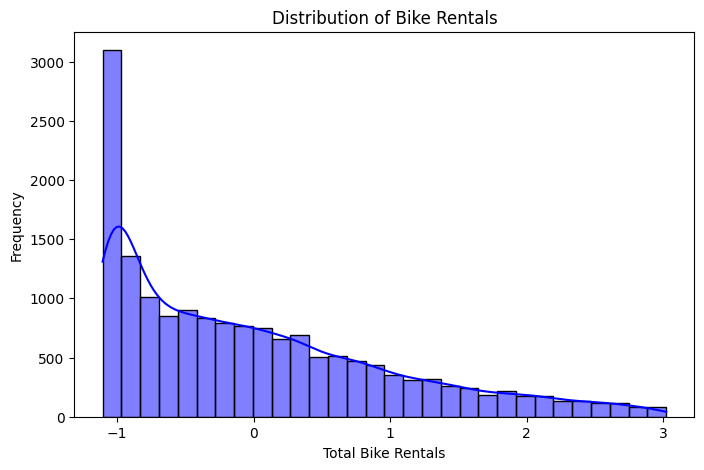

In [9]:
# Visualize distribution of bike rentals on a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.title('Distribution of Bike Rentals')
plt.show()

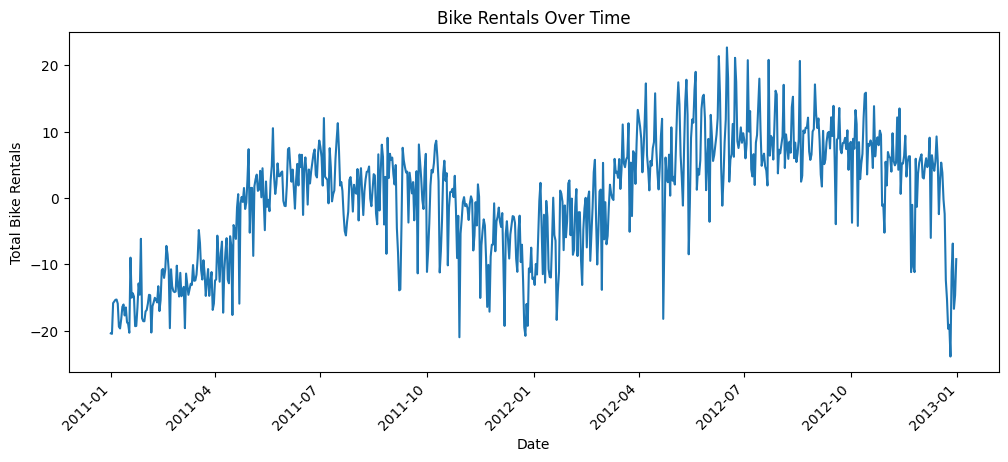

In [10]:
# Visualize bike rentals over time on a line chart
plt.figure(figsize=(12, 5))
df.groupby('dteday')['cnt'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals')
plt.title('Bike Rentals Over Time')
plt.xticks(rotation=45)
plt.show()

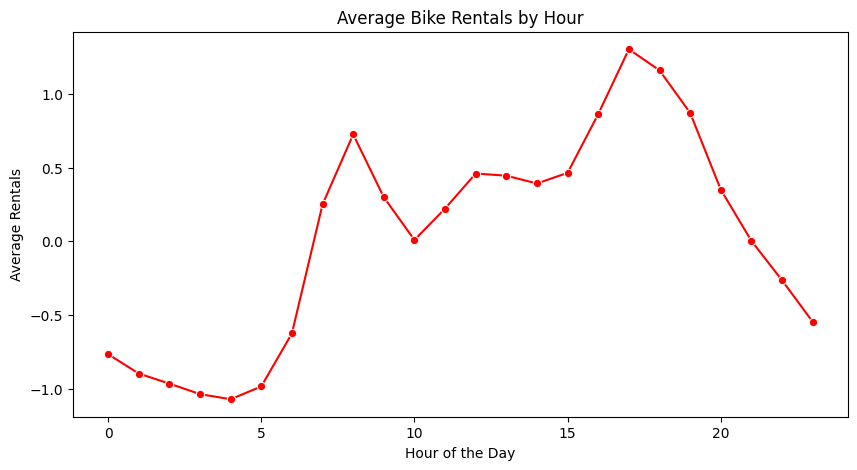

In [11]:
# Visualize average rentals an hour in a line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby('hr')['cnt'].mean(), marker='o', color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Hour')
plt.show()

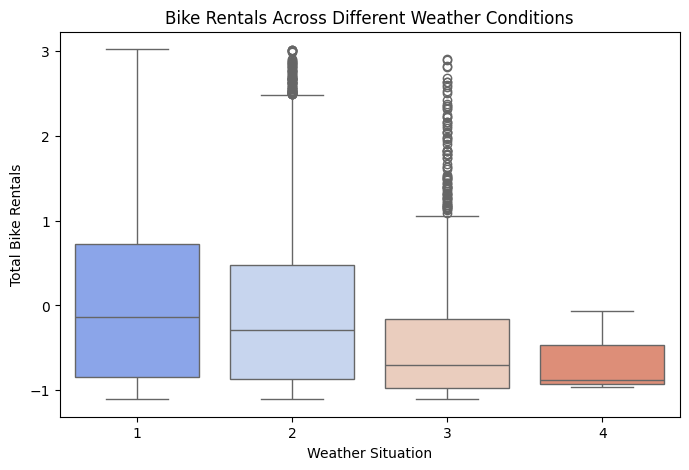

In [12]:
# Impact of the weather on bike rentals
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['weathersit'], y=df['cnt'], palette='coolwarm')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.title('Bike Rentals Across Different Weather Conditions')
plt.show()

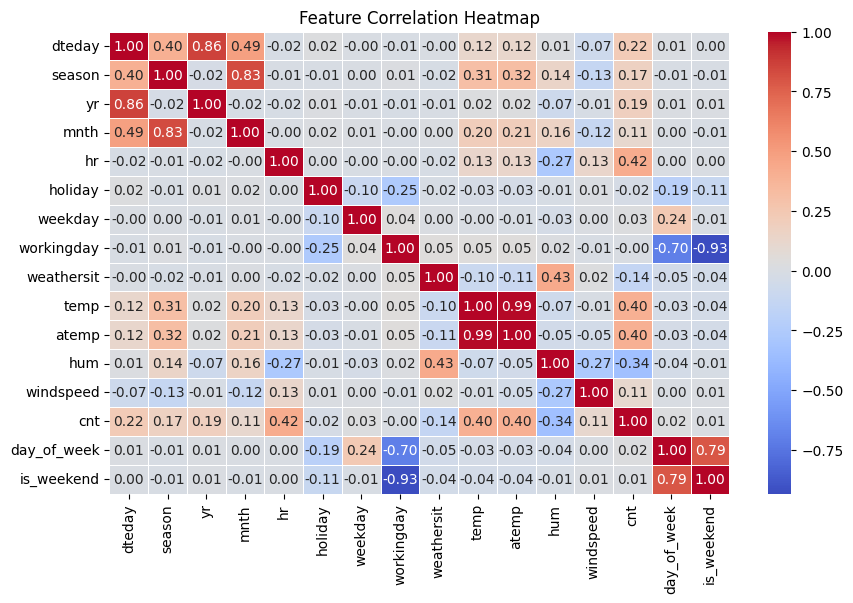

In [13]:
# Heatmap for correlated variables (diregard 1.0 as it's likely it's own variable)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

Our target variable 'cnt' shows moderate correlations with 'hr', so as the day progresses so does the count of rentals. Also with temp, so as the temp increases rentals tend to increase. However, for humidity 'hum', it shows as humidity increases rentals tend to decrease at -0.34.

## Traditional ML Classifier: Support Vector Machine (SVM)

#### Predict whether a given day will have "High" or "Low" bike rental demand.

In [14]:
# Convert 'dteday' to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

# Extract date-based features
df['day_of_week'] = df['dteday'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Sat/Sun

# Convert categorical variables into numerical format
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[categorical_columns] = df[categorical_columns].astype(int)

# Define target variable as a binary classification problem (High vs. Low demand)
median_cnt = df['cnt'].median()
df['high_demand'] = (df['cnt'] > median_cnt).astype(int)  # 1 if above median, 0 otherwise

# Drop unnecessary columns
df.drop(columns=['dteday', 'cnt'], inplace=True)  # Remove datetime and original cnt column

# Define feature set (X) and target (y)
X = df.drop(columns=['high_demand'])  # Features
y = df['high_demand']  # Binary classification target

# Scale numerical features
scaler = StandardScaler()
X[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(X[['temp', 'atemp', 'hum', 'windspeed']])

# Split into training & testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8812

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1661
           1       0.87      0.90      0.88      1646

    accuracy                           0.88      3307
   macro avg       0.88      0.88      0.88      3307
weighted avg       0.88      0.88      0.88      3307


Confusion Matrix:
 [[1437  224]
 [ 169 1477]]


### SVM Visualizations

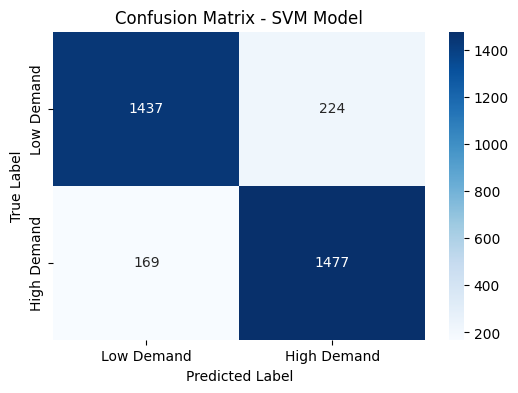

In [15]:
# Confusion Matrix Heatmap, dark areas show correctly predicted high/low demand vs. liht areas showing incorrect predictions
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Demand', 'High Demand'], yticklabels=['Low Demand', 'High Demand'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Model')
plt.show()

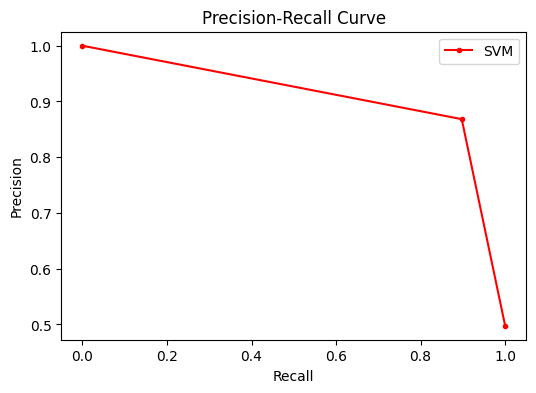

In [16]:
# Precision-Recall Curve (balance between precision and recall)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', color='red', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

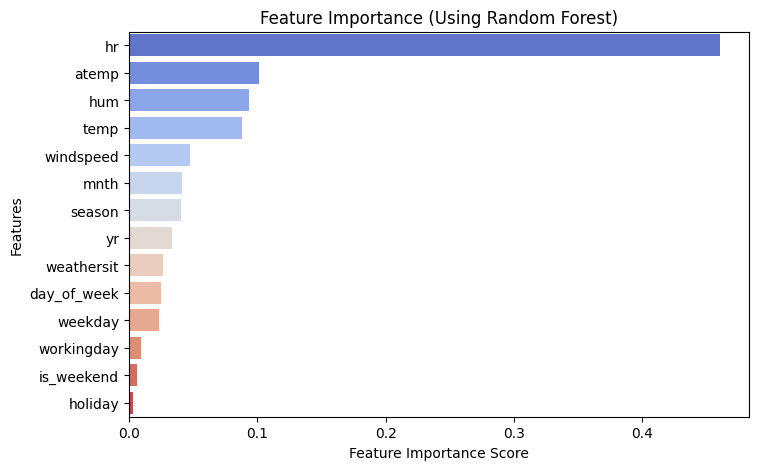

In [17]:
# Feature Importance (Using Random Forest as Approximation) = importance of different features in predicting bike rental demand

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="coolwarm")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Using Random Forest)')
plt.show()

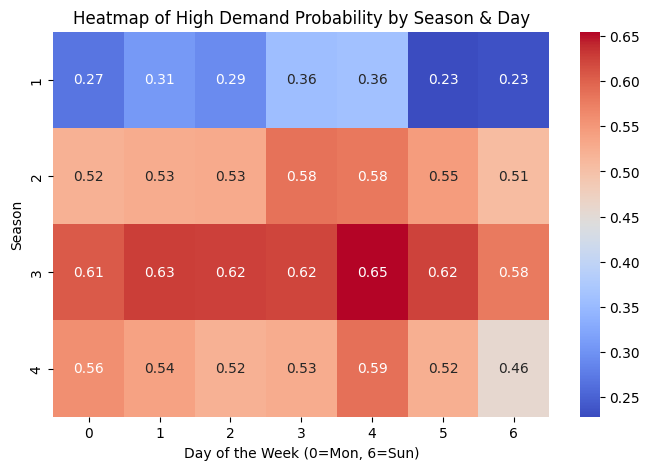

In [18]:
# Heatmap of High Demand Probability by Season & Day

plt.figure(figsize=(8,5))
pivot_table = df.pivot_table(values='high_demand', index='season', columns='day_of_week', aggfunc='mean')

sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f")
plt.xlabel('Day of the Week (0=Mon, 6=Sun)')
plt.ylabel('Season')
plt.title('Heatmap of High Demand Probability by Season & Day')
plt.show()

## LSTM (Deep Learning) Model

#### Predict bike rentals into the future

Epoch 1/50


c:\Users\anblumha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1310 - val_loss: 0.0426
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0211 - val_loss: 0.0329
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0222 - val_loss: 0.0303
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0202 - val_loss: 0.0301
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0163 - val_loss: 0.0303
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - val_loss: 0.0311
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0144 - val_loss: 0.0363
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0142 - val_loss: 0.0352
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0144 - val_loss: 0.0348
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0162 - val_loss: 0.0332
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0161 - val_loss: 0.0353
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0149 - val_l

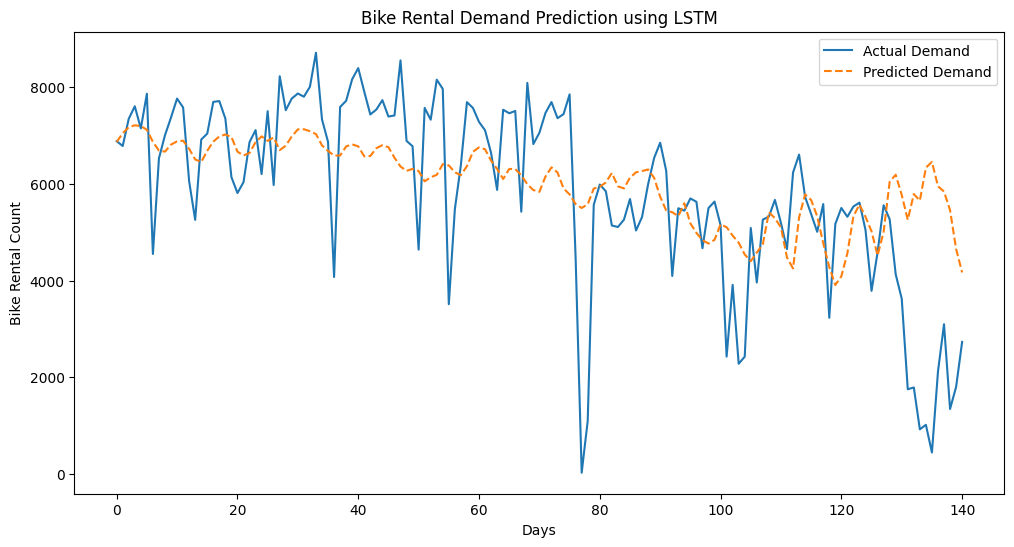

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Load dataset
# df = pd.read_csv('/Users/chrisalleyne/Downloads/bike_sharing_dataset/day.csv')
url = "https://raw.githubusercontent.com/lex-lim/AAI530-Final/main/day.csv"
df = pd.read_csv(url)
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)

# Select features and target
features = ['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']
target = 'cnt'

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features + [target]])

# Create sequences for LSTM
sequence_length = 30  # Use past 30 days to predict the next day
X, y = [], []
for i in range(len(df_scaled) - sequence_length):
    X.append(df_scaled[i:i + sequence_length, :-1])  # Features
    y.append(df_scaled[i + sequence_length, -1])  # Target
X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, X.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scale predictions
scaler_target = MinMaxScaler()
scaler_target.fit(df[['cnt']])
y_pred_rescaled = scaler_target.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Demand')
plt.plot(y_pred_rescaled, label='Predicted Demand', linestyle='dashed')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rental Demand Prediction using LSTM')
plt.show()


## Simulating 30 days of bike rental data

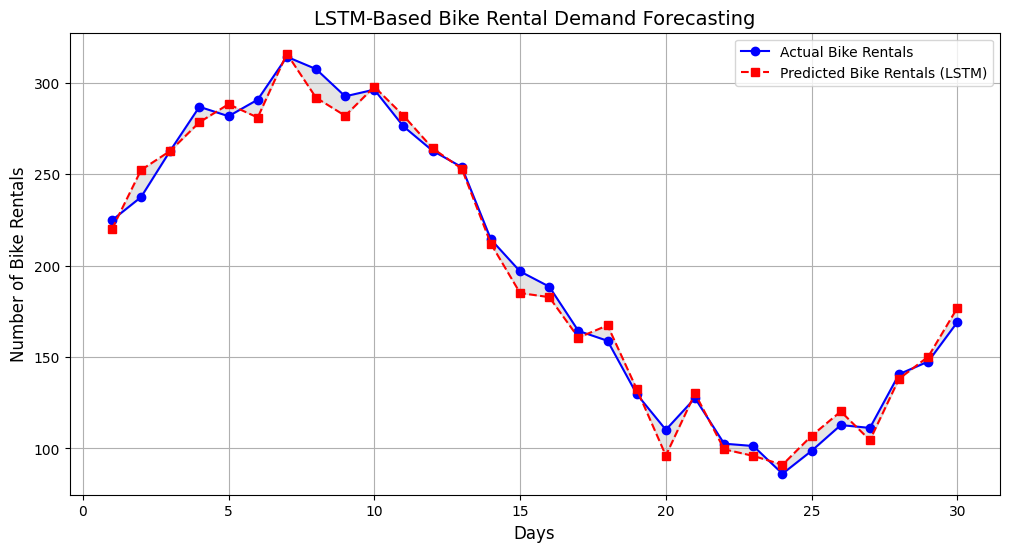

In [20]:
# Simulating 30 days of bike rental data
np.random.seed(42)
days = np.arange(1, 31)
actual_rentals = np.sin(days / 5) * 100 + np.random.normal(0, 10, size=30) + 200
predicted_rentals = actual_rentals + np.random.normal(0, 8, size=30)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(days, actual_rentals, label="Actual Bike Rentals", marker="o", linestyle="-", color="blue")
plt.plot(days, predicted_rentals, label="Predicted Bike Rentals (LSTM)", marker="s", linestyle="--", color="red")

# Highlight the difference
plt.fill_between(days, actual_rentals, predicted_rentals, color="gray", alpha=0.2)

# Titles and labels
plt.title("LSTM-Based Bike Rental Demand Forecasting", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Number of Bike Rentals", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Closing MSE Validation

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 219.95%


In [23]:
from statsmodels.stats.power import TTestIndPower

# Define parameters
alpha = 0.05  # Significance level
power = 0.8  # Desired statistical power
std_dev = np.std(y_test_rescaled - y_pred_rescaled)  # Standard deviation of errors

# Compute required effect size
analysis = TTestIndPower()
effect_size = analysis.solve_power(effect_size=None, nobs1=len(y_test_rescaled), alpha=alpha, power=power)

# Compute MDE
mde = effect_size * std_dev
print(f"Minimum Detectable Effect (MDE): {mde:.2f} bike rentals")


Minimum Detectable Effect (MDE): 536.68 bike rentals


### Export Results

In [28]:
import os

# Get the user's Downloads folder dynamically
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "day_predicted.csv")

# Recreate the original date index (since we used train-test split)
df_results = df.iloc[-len(y_test_rescaled):].copy()  # Take only test set rows
df_results['predicted_cnt'] = y_pred_rescaled  # Add predictions as new column

# Save the dataframe as CSV in the Downloads folder
df_results.to_csv(downloads_path, index=True)

print(f"✅ day_predicted.csv saved successfully at: {downloads_path}")

✅ day_predicted.csv saved successfully at: C:\Users\anblumha\Downloads\day_predicted.csv


### Citation:

This assignment was completed with assistance from ChatGPT 4.0, developed by OpenAI, for suggestions and validation purposes. The tool was utilized to refine ideas, validate methods, and ensure clarity in the analysis.

### Repo:

I had issues with repo comment submission previously, adding here as a backup reference:

https://github.com/AndrewBlumhardt/aai-iot-linear-regression